## Thesis Committee Meeting 2023

Plots for thesis committee meeting occurring on 10/12/2023.

Slide deck [here](https://docs.google.com/presentation/d/1Vx9YwWmy6KL0cn3JGoF_LBFpD6Y-mM8XUlJoklqIhiM/edit#slide=id.g2888ba23161_0_351)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pandas as pd

from multiglm.data.dataset_loader import *
from multiglm.models.linear_regression import *
from multiglm.data import ANIMAL_IDS

sns.set_context("talk")

%load_ext autoreload
%autoreload 2

choice_palette = sns.color_palette("Set2", 3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fig 1- Akrami rat weights

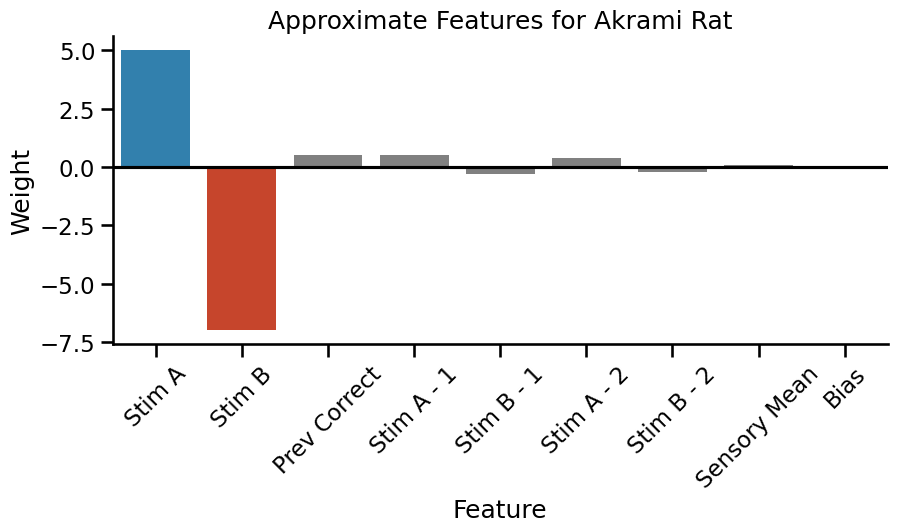

In [2]:
athena_weights_palette = ["#1d85c2", "#e03412", "purple"]
feature = [
    "Stim A",
    "Stim B",
    "Prev Correct",
    "Stim A - 1",
    "Stim B - 1",
    "Stim A - 2",
    "Stim B - 2",
    "Sensory Mean",
    "Bias",
]
weight = [5, -7, 0.5, 0.5, -0.3, 0.4, -0.2, 0.1, 0.04]

color = [
    athena_weights_palette[0],
    athena_weights_palette[1],
    "grey",
    "grey",
    "grey",
    "grey",
    "grey",
    "grey",
    "yellow",
]

simulated_df = pd.DataFrame({"Feature": feature, "Weight": weight, "Color": color})

sns.set_context("talk")
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(
    data=simulated_df,
    x="Feature",
    y="Weight",
    hue_order=feature,
    palette=simulated_df.Color,
)
_ = plt.xticks(rotation=45)

ax.axhline(0, color="k")
_ = ax.set_title("Approximate Features for Akrami Rat")
sns.despine()

# Figures 2- Violation EDA 

## Load in

In [31]:
full_df = DatasetLoader(
    animal_ids=ANIMAL_IDS, data_type="new_all", relative_data_path="../../data"
).load_data()
trained_df = DatasetLoader(
    animal_ids=ANIMAL_IDS, data_type="new_trained", relative_data_path="../../data"
).load_data()

Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']
Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']


## Fig 2.1 Trial Results Across A Session

In [32]:
animal_id = "W065"
session_num = 250

session_df = full_df.query("animal_id == @animal_id and session == @session_num").copy()


print(
    f"selected session {session_num} for animal {animal_id} that has {len(session_df)} trials \nwith a hit rate of {session_df.hit.mean():.2f} and violation rate {session_df.violation.mean():.2f}"
)

selected session 250 for animal W065 that has 262 trials 
with a hit rate of 0.79 and violation rate 0.23


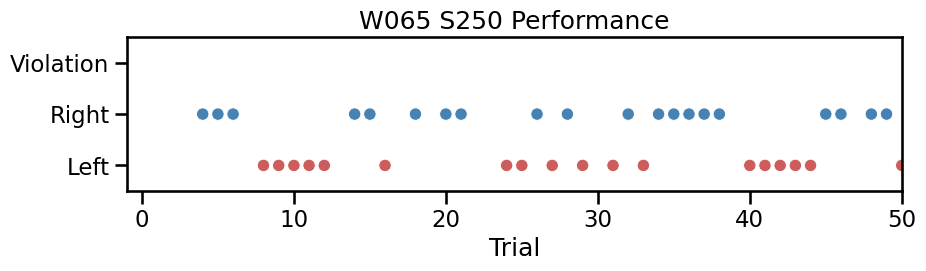

In [38]:
fig, ax = plt.subplots(figsize=(10, 2))

sns.scatterplot(
    data=session_df,
    x="trial",
    y="choice",
    hue="choice",
    hue_order=[0, 1, 2],  # fyi cant have any other order
    palette=["indianred", "steelblue", "white"],
    legend=False,
)
ax.set_yticks([0, 1, 2])  # Set the positions for the labels
ax.set_yticklabels(["Left", "Right", "Violation"])  # Set the label text

_ = ax.set(
    xlabel="Trial",
    ylabel="",
    title=f"{animal_id} S{session_num} Performance",
    xlim=(-1, 50),
    ylim=(-0.5, 2.5),
)

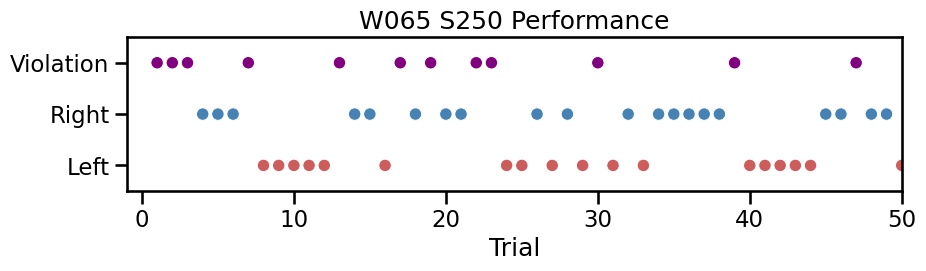

In [37]:
fig, ax = plt.subplots(figsize=(10, 2))

sns.scatterplot(
    data=session_df,
    x="trial",
    y="choice",
    hue="choice",
    hue_order=[0, 1, 2],  # fyi cant have any other order
    palette=["indianred", "steelblue", "purple"],
    legend=False,
)
ax.set_yticks([0, 1, 2])  # Set the positions for the labels
ax.set_yticklabels(["Left", "Right", "Violation"])  # Set the label text

_ = ax.set(
    xlabel="Trial",
    ylabel="",
    title=f"{animal_id} S{session_num} Performance",
    xlim=(-1, 50),
    ylim=(-0.5, 2.5),
)

## Fig 2.2 Overall Frac of Violation Trials

I tired to do this on an animal, session basis, but because not all sessions had all three choices, the code was breaking and the final proportions plotted did not sum to one. Would be good to implement this another time. I think the overall right might end up being slightly lower. 

Numbers don't change much if looking only at stage 3/4 or stage 4 data.

In [19]:
full_df["choice_cat"] = full_df.choice.astype("category")
vs = full_df.query("training_stage > 0").groupby("animal_id").violation.mean().values

vs.std(), vs.mean()

(0.09062065260516716, 0.20306932750101284)

In [20]:
# Count the occurrences of each combination of 'animal_id' and 'choice_cat'
grouped_data = (
    full_df.groupby(["animal_id", "choice_cat"]).size().reset_index(name="count")
)

# Calculate the total count for each animal
total_count_per_animal = (
    full_df.groupby("animal_id").size().reset_index(name="total_count")
)

# Merge the two dataframes to get both count and total_count in one dataframe
merged_data = pd.merge(grouped_data, total_count_per_animal, on="animal_id")

# Calculate the proportion
merged_data["proportion"] = merged_data["count"] / merged_data["total_count"]
choice_mapping = {0: "Left", 1: "Right", 2: "Violation"}
merged_data["choice_label"] = merged_data["choice_cat"].map(choice_mapping)

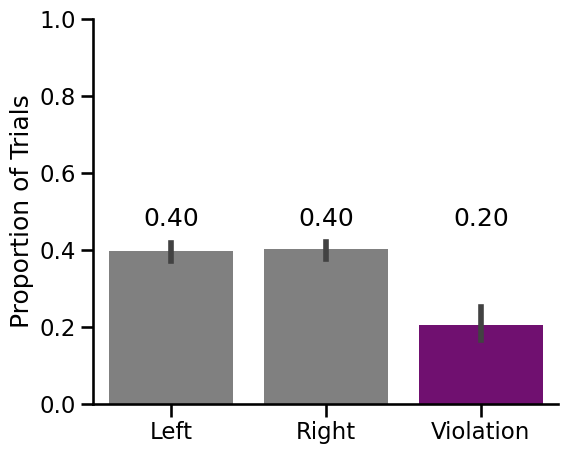

In [22]:
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(
    x="choice_label",
    y="proportion",
    data=merged_data,
    palette=["grey", "grey", "purple"],
    ax=ax,
)

ax.set(
    xlabel="",
    ylabel="Proportion of Trials",
    ylim=(0, 1),
)


hue_order = sorted(
    merged_data["choice_cat"].unique(),
)


for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        0.45,
        f"{bar.get_height():.2f}",  # Format to 2 decimal places
        ha="center",
        va="bottom",
    )
sns.despine()

## Figure 2.3a Hit Rate ~ Violation Rate STOPPED HERE AND MOVED TO EDA NOTEBOOK!!

OLS with session avg hit rate ~ session avg violation rate

In [27]:
vdf_hit_viol_by_session = (
    full_df.groupby(["animal_id", "session"])[["violation", "hit"]]
    .mean()
    .reset_index()
    .groupby("animal_id")[["violation", "hit"]]
    .mean()
    .reset_index()
)

x = "violation"
y = "hit"
results = univariate_linear_regression(
    vdf_hit_viol_by_session, x, y, print_results=True
)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.570
Date:                Sat, 17 Feb 2024   Prob (F-statistic):              0.229
Time:                        10:43:51   Log-Likelihood:                 30.301
No. Observations:                  17   AIC:                            -56.60
Df Residuals:                      15   BIC:                            -54.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7977      0.028     28.928      0.0

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Axes: title={'center': 'Hit ~ Viol by Animal'}, xlabel='Session Avg. Violation Rate', ylabel='Session Avg. Hit Rate'>

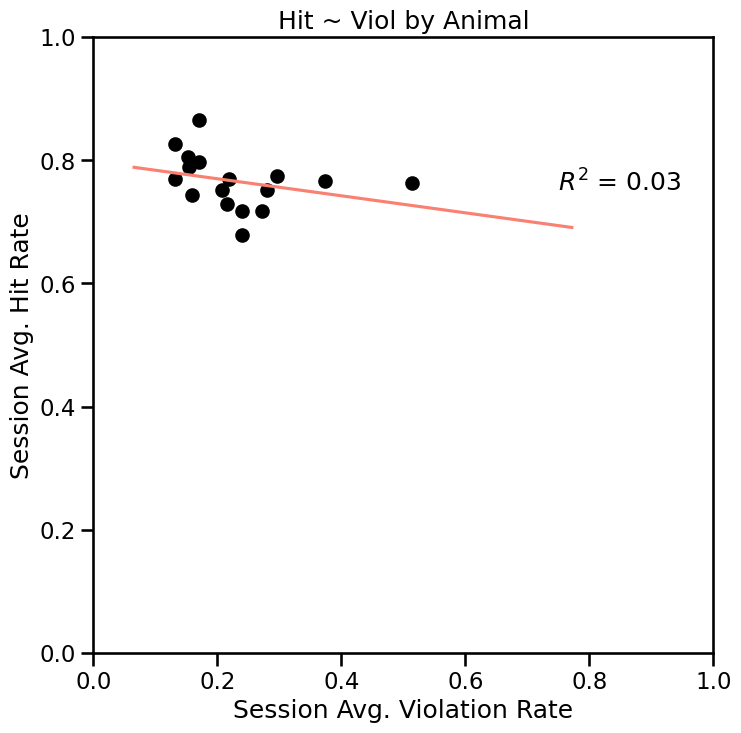

In [30]:
plot_univariate_linear_regression(
    results,
    xlabel="Session Avg. Violation Rate",
    ylabel="Session Avg. Hit Rate",
    title=f"Hit ~ Viol by Animal",
    xlim=(0, 1),
    ylim=(0, 1),
)

## Figure 2.3b Final Hit Rate ~ Violation Rate (Motor, Rule), Time to Train, Number of Delays


In [314]:
"""
Creating the "trained_threshold_df" this df is used to determine at what
session an animal becomes trained. In this case we define trained as the
last crossing of the 0.70 threshold in the 2 week rolling average hit rate
in stage 4. The first and median crossings were also evaluated in the EDA notebook.
"""


threshold = 0.70

grouped_df = (
    df.query("training_stage_cat == 4").groupby(["animal_id", "session"]).hit.mean()
)

# Calculate the rolling mean with a window of 50 for each subject
rolling_mean = grouped_df.rolling(window=14).mean().reset_index()
rolling_mean["crossed_threshold"] = (rolling_mean["hit"].shift() < threshold) & (
    rolling_mean["hit"] >= threshold
)
crossings_count = rolling_mean.groupby("animal_id")["crossed_threshold"].sum()

train_threshold_df = pd.DataFrame({"animal_id": crossings_count.index})

train_threshold_df["n_crossings"] = crossings_count.values

train_threshold_df["max_cross_sess"] = (
    rolling_mean.groupby("animal_id")
    .apply(lambda x: x.loc[x["crossed_threshold"]].session.max())
    .values
)

train_threshold_df["min_cross_sess"] = (
    rolling_mean.groupby("animal_id")
    .apply(lambda x: x.loc[x["crossed_threshold"]].session.min())
    .values
)

"""Add information for each animal on
its performance once it was "trained" as defined in the cell
above is the is the final session in which their 2 week rolling average
hit rate went from low to high above 0.70 threshold"""

post_trained_df = df.merge(
    train_threshold_df[["animal_id", "max_cross_sess"]], on="animal_id"
)
post_trained_df = post_trained_df[
    post_trained_df["session"] > post_trained_df["max_cross_sess"]
]

train_threshold_df["post_train_hit_by_session"] = train_threshold_df["animal_id"].map(
    post_trained_df.groupby(["animal_id", "session"])["hit"]
    .mean()
    .reset_index()
    .groupby("animal_id")["hit"]
    .mean()
)


train_threshold_df["n_delays"] = train_threshold_df["animal_id"].map(
    df.query("training_stage >= 3").groupby("animal_id").delay.nunique()
)

train_threshold_df["motor_learning_viols"] = train_threshold_df["animal_id"].apply(
    lambda x: df.query("training_stage_cat == 1 and animal_id == @x")[
        "violation"
    ].mean()
)

train_threshold_df["rule_learning_viols"] = train_threshold_df["animal_id"].apply(
    lambda x: df.query("training_stage_cat > 2 and session < 200 and animal_id == @x")[
        "violation"
    ].mean()
)

train_threshold_df.rename(columns={"max_cross_sess": "time_to_train"}, inplace=True)

data = train_threshold_df.copy()

data.to_csv("../../data/processed/rat_train_threshold.csv", index=False)
train_threshold_df.head(2)

,animal_id,n_crossings,time_to_train,min_cross_sess,post_train_hit_by_session,n_delays,motor_learning_viols,rule_learning_viols
0,W051,6,307,135,0.792447,9,0.209089,0.154351
1,W060,4,258,92,0.825624,4,0.227650,0.136164


/Users/jessbreda/Desktop/github/animal-learning/notebooks/meetings/../../src/models/linear_regression.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


(-0.05, 0.05)

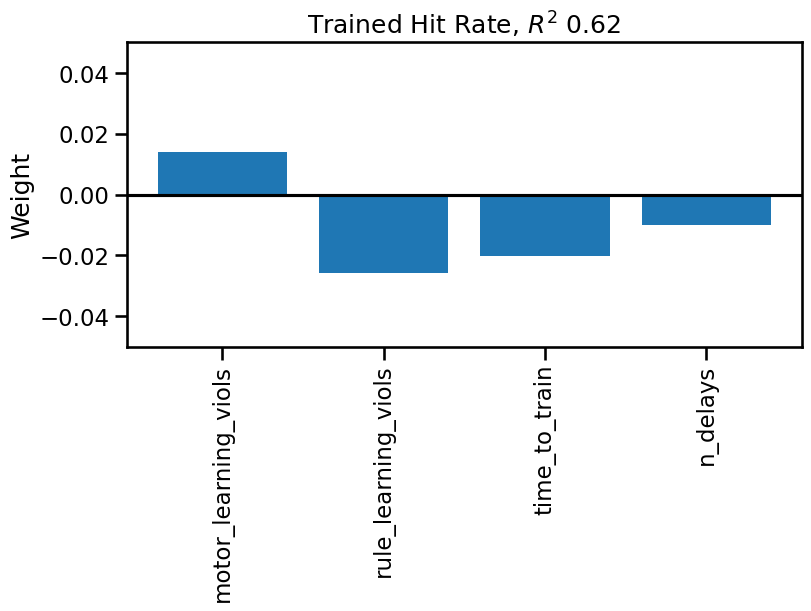

In [315]:
features = [
    "motor_learning_viols",
    "rule_learning_viols",
    "time_to_train",
    "n_delays",
]
predictor = "post_train_hit_by_session"

model, predict, rsq, rns, ws = fit_linear_model(
    data, predictor, features, whiten=True, plot=False
)

fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)
plot_weights(ax, rns, ws, f"Trained Hit Rate, $R^2$ {rsq:.2f}")
plt.ylim(-0.05, 0.05)

## Fig 2.3 Distribution of Violation Rates Across a Session

The functions below do the following:

1. Find valid sessions for an animal that have a minimum number of trials and maximum violation rate
2. In each session that meets that criteria, grab the trials in "start", "middle", and "end" ranges.
    * e.g. first 50, middle 50, last 50 trials with a relative marker for the latter two
3. plot the probability of a violation for each trial bin in "start", "middle" or "end" dfs as a line plot with 95% CIs

Note: this was run with and without drop animals and results were similar so current plots are with drop animals removed.

In [224]:
def find_valid_sessions(
    trials_df, minimum_session_trials=100, max_session_violation_rate=0.5
):
    # Count the number of trials in each session
    trial_count = trials_df.groupby("session").size()

    # Calculate the violation rate per session
    violation_rate = trials_df.groupby("session")["violation"].mean()

    valid_sessions = violation_rate[
        (violation_rate < max_session_violation_rate)
        & (trial_count > minimum_session_trials)
    ].index

    return valid_sessions


def grab_start_trials(n_trials, trials_df):
    return trials_df.groupby("session").head(n_trials)


def grab_end_trials(n_trials, trials_df):
    end_trials = trials_df.groupby("session").tail(n_trials).copy()
    end_trials["relative_trials"] = end_trials.groupby("session").cumcount() + 1
    return end_trials


def grab_middle_trials(n_trials, trials_df):
    middle_trials_df = pd.DataFrame()
    for session, group_df in trials_df.groupby("session"):
        total_trials = len(session_df)
        start_index = int(
            total_trials // 2 - (n_trials / 2)
        )  # find middle minus half of n_trials
        end_index = int(start_index + n_trials)  # start to end index
        middle_trials_single_session = group_df.iloc[start_index:end_index].copy()
        middle_trials_single_session["relative_trials"] = range(
            1, len(middle_trials_single_session) + 1
        )

        middle_trials_df = pd.concat(
            [middle_trials_df, middle_trials_single_session], ignore_index=True
        )
    return middle_trials_df


def find_valid_sessions(
    trials_df, minimum_session_trials=100, max_session_violation_rate=0.5
):
    # Count the number of trials in each session
    trial_count = trials_df.groupby("session").size()

    # Calculate the violation rate per session
    violation_rate = trials_df.groupby("session")["violation"].mean()

    valid_sessions = violation_rate[
        (violation_rate < max_session_violation_rate)
        & (trial_count > minimum_session_trials)
    ].index

    return valid_sessions


def plot_violation_probability_over_trials(df, trail_group, title, **kwargs):
    violation_probability_df = (
        df.groupby(["animal_id", trail_group])["violation"].mean().reset_index()
    )

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 3))
    ax = sns.lineplot(
        x=trail_group, y="violation", data=violation_probability_df, **kwargs
    )

    _ = ax.set(
        xlabel="Trial Number",
        ylabel="P(Violation)",
        title=f"Session {title}",
        ylim=(0, 1),
    )

    return ax

The loop below actually makes each df for each window using functions above, then plots to follow.

In [207]:

start_trials_df = pd.DataFrame()
middle_trials_df = pd.DataFrame()
end_trials_df = pd.DataFrame()

n_trials = 50
minimum_session_trials = 100
max_session_violation_rate = 0.5


for animal_id, group_df in vdf.groupby("animal_id"):
    if animal_id in drop_animals:
        continue

    valid_sessions = find_valid_sessions(
        group_df, minimum_session_trials, max_session_violation_rate
    )
    group_df = group_df.query(
        "session in @valid_sessions and training_stage_cat == 4"
    ).copy()

    start_trials_df = pd.concat(
        [start_trials_df, grab_start_trials(n_trials, group_df)], ignore_index=True
    )

    middle_trials_df = pd.concat(
        [middle_trials_df, grab_middle_trials(n_trials, group_df)], ignore_index=True
    )

    end_trials_df = pd.concat(
        [end_trials_df, grab_end_trials(n_trials, group_df)], ignore_index=True
    )

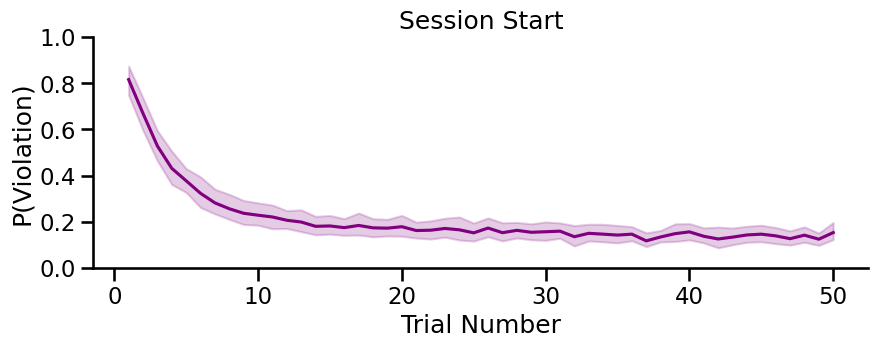

In [318]:
ax = plot_violation_probability_over_trials(
    start_trials_df, "trial", "Start", color="purple"
)

_ = ax.set_xticks(ticks=range(0, n_trials + 1, 10), labels=range(0, n_trials + 1, 10))

sns.despine()

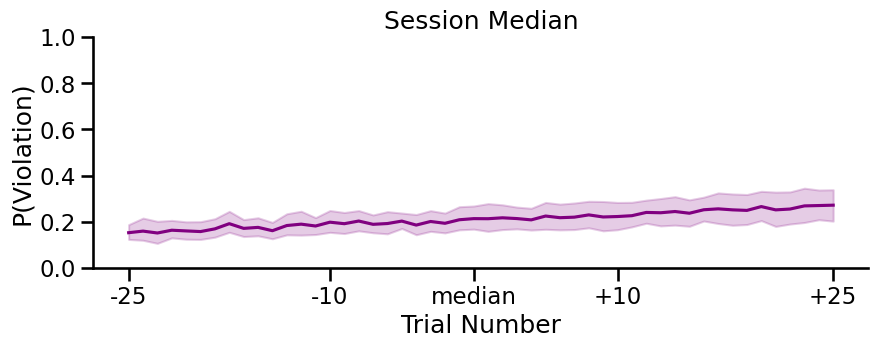

In [317]:
ax = plot_violation_probability_over_trials(
    middle_trials_df, "relative_trials", "Median", color="purple"
)
_ = ax.set_xticks(
    ticks=(1, 15, 25, 35, 50), labels=("-25", "-10", "median", "+10", "+25")
)
sns.despine()

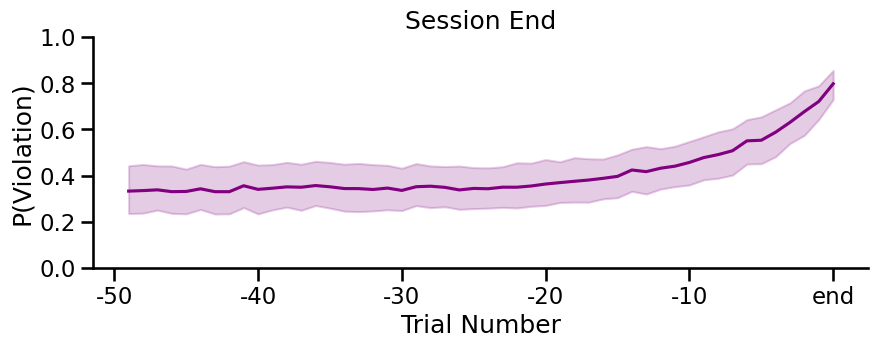

In [316]:
ax = plot_violation_probability_over_trials(
    end_trials_df, "relative_trials", "End", color="purple"
)

_ = ax.set_xticks(
    ticks=range(0, n_trials + 1, 10), labels=("-50", "-40", "-30", "-20", "-10", "end")
)
sns.despine()

# OLD STUFF BELOW

In [ ]:
session_hit_viol_rates = (
    vdf.query("training_stage_cat == 4 and animal_id not in @drop_animals")
    .groupby(["animal_id", "session"])
    .agg({"hit": "mean", "violation": "mean", "trial": "count"})
    .reset_index()
)


,animal_id,session,hit,violation,trial
0,W051,49,0.534759,0.248996,249
1,W051,50,0.579710,0.306533,199
2,W051,51,0.638298,0.253968,189
3,W051,52,0.597510,0.237342,316
4,W051,53,0.618519,0.226361,349
...,...,...,...,...,...
1973,W089,195,0.766798,0.285311,354
1974,W089,196,0.780488,0.623853,109
1975,W089,197,0.747059,0.300412,243
1976,W089,198,0.744048,0.328000,250


[Text(0.5, 0, 'Session Violation Rate'),
 Text(0, 0.5, 'Session Hit Rate'),
 Text(0.5, 1.0, 'Hit Rate vs Violation Rate'),
 (0.0, 1.0),
 (0.0, 1.0)]

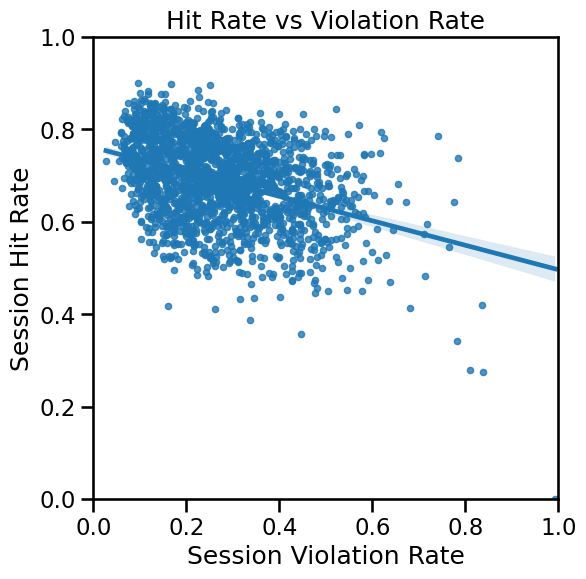

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.regplot(
    data=session_hit_viol_rates.query("trial > 100"),
    x="violation",
    y="hit",
    ax=ax,
    scatter_kws={"s": 20},  # Optional: adjust the size of scatter points
)

ax.set(
    xlabel="Session Violation Rate",
    ylabel="Session Hit Rate",
    title="Hit Rate vs Violation Rate",
    xlim=(0, 1),
    ylim=(0, 1),
)

## Violation Plots

Two plots that were requested in lab meeting were (1) violations by delay length and (2) violations over a session.

#### Violations by delay length

In [3]:
vdf.query

,animal_id,session,trial,s_a,s_b,choice,correct_side,hit,delay,training_stage,violation,n_trial,training_stage_cat
0,W051,1,1,NaN,NaN,1.0,0,0.0,1.00,1,False,0,1
1,W051,2,1,NaN,NaN,1.0,0,0.0,0.01,1,False,1,1
2,W051,2,2,NaN,NaN,0.0,0,1.0,0.01,1,False,2,1
3,W051,2,3,NaN,NaN,0.0,1,0.0,0.01,1,False,3,1
4,W051,2,4,NaN,NaN,1.0,0,0.0,0.01,1,False,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899813,W094,199,213,84.0,76.0,NaN,1,NaN,4.10,4,True,2461733,4
899814,W094,199,214,76.0,68.0,NaN,1,NaN,2.10,4,True,2461734,4
899815,W094,199,215,92.0,84.0,NaN,1,NaN,3.10,4,True,2461735,4
899816,W094,199,216,84.0,76.0,NaN,1,NaN,4.10,4,True,2461736,4


<Axes: xlabel='delay', ylabel='violation'>

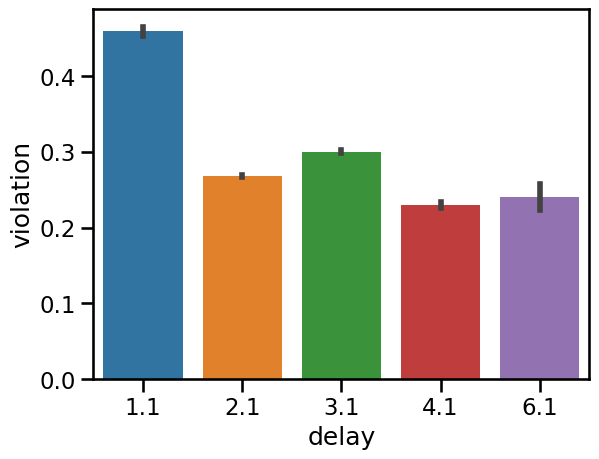

In [4]:
sns.barplot(data=vdf.query("training_stage > 2"), x="delay", y="violation")

<Axes: xlabel='delay', ylabel='violation'>

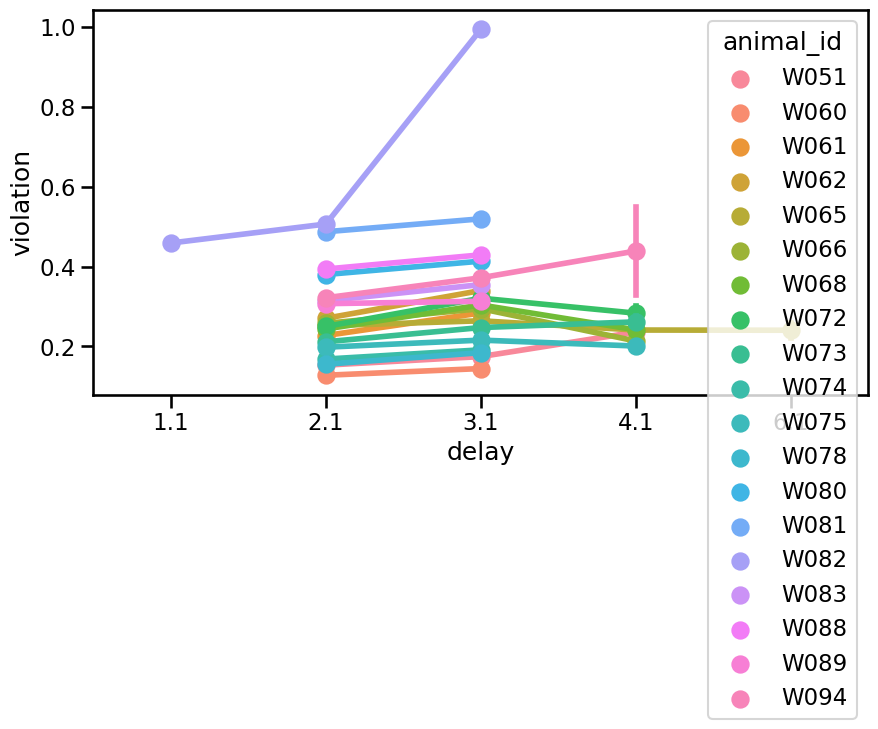

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(
    data=vdf.query("training_stage > 2"),
    x="delay",
    y="violation",
    hue="animal_id",
)

Looks like delay 1.1 and 6.1 were rarely ever used for these animals, so I will drop them from the plot since I want to compare all the animals against each other.

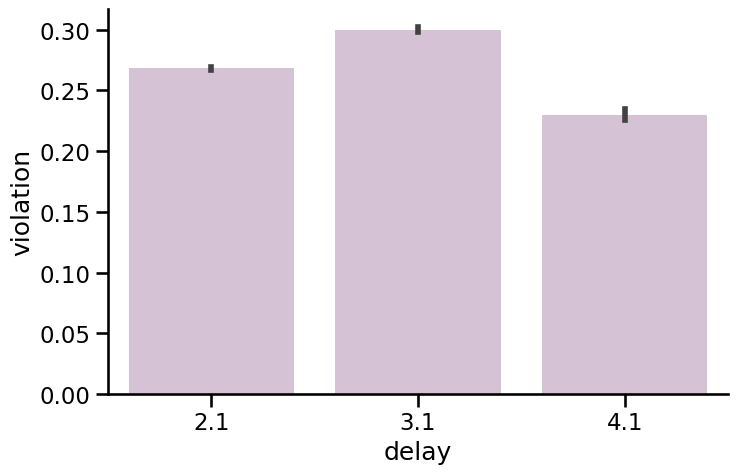

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    data=vdf.query("training_stage > 2 and delay > 2 and delay < 6"),
    x="delay",
    y="violation",
    color="thistle",
    ax=ax,
)

sns.despine()

> **Summary**: it does not appear that violation differs by delay length. It may be that 4.1 comes later in the task when an animal is more experienced with the structure. An interesting plot to make would be delta between delays on trial t

In [7]:
# Group by animal_id and calculate the delta_delay
vdf["delta_delay"] = vdf.groupby(["animal_id", "session"])["delay"].transform(
    lambda x: x - x.shift(1)
)

vdf.loc[vdf["trial"] == 2, "delta_delay"] = np.nan

In [8]:
vdf.query("training_stage > 2").delay.unique()

array([2.1, 4.1, 3.1, 6.1, 1.1])

In [9]:
vdf["delta_delay"] = vdf.delta_delay.round(2)

[Text(0.5, 0, 'Delta Delay [s]'),
 Text(0, 0.5, 'Violation Rate'),
 Text(0.5, 1.0, '<-- Shorter Delay || Longer Delay -->')]

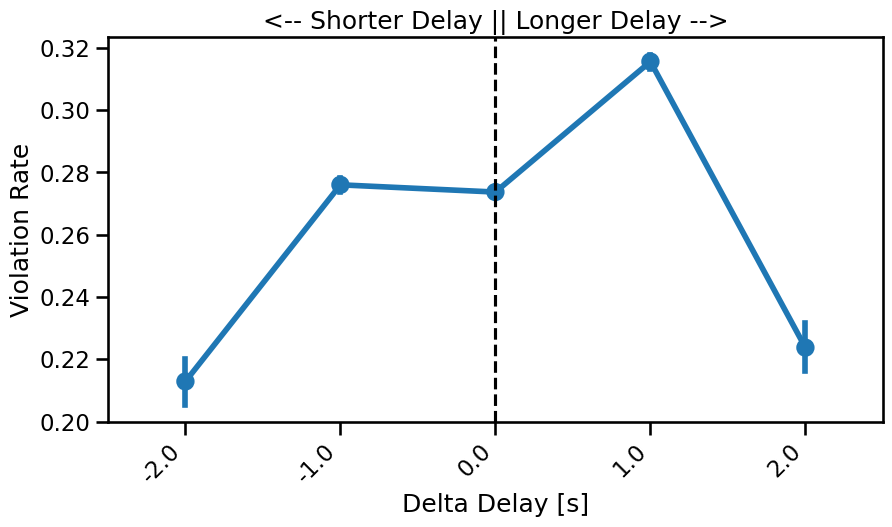

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(
    data=vdf.query("training_stage > 2 and delta_delay > -3 and delta_delay < 3"),
    x="delta_delay",
    y="violation",
    # hue="animal_id",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.axvline(2, color="k", linestyle="--")

ax.set(
    xlabel=("Delta Delay [s]"),
    ylabel=("Violation Rate"),
    title=("<-- Shorter Delay || Longer Delay -->"),
)

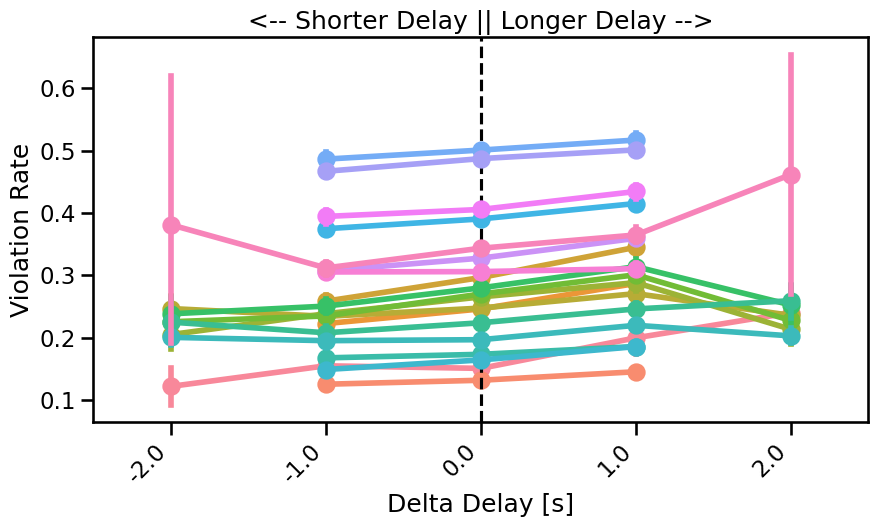

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(
    data=vdf.query("training_stage > 2 and delta_delay > -3 and delta_delay < 3"),
    x="delta_delay",
    y="violation",
    hue="animal_id",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.axvline(2, color="k", linestyle="--")

ax.set(
    xlabel=("Delta Delay [s]"),
    ylabel=("Violation Rate"),
    title=("<-- Shorter Delay || Longer Delay -->"),
)

# turn of legend
ax.legend().set_visible(False)

[Text(0.5, 0, 'Delta Delay [s]'),
 Text(0, 0.5, 'Violation Rate'),
 Text(0.5, 1.0, '<-- Shorter Delay || Longer Delay -->')]

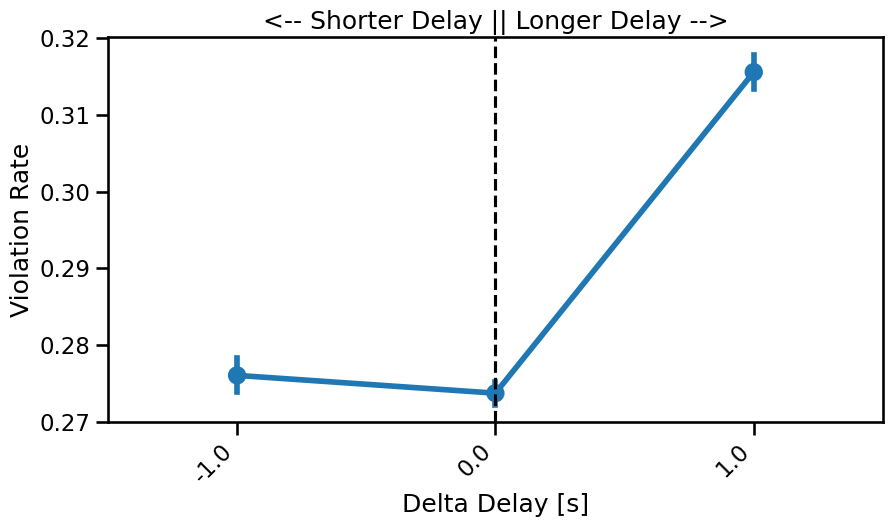

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(
    data=vdf.query("training_stage > 2 and delta_delay > -2 and delta_delay < 2"),
    x="delta_delay",
    y="violation",
    # hue="animal_id",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.axvline(1, color="k", linestyle="--")

ax.set(
    xlabel=("Delta Delay [s]"),
    ylabel=("Violation Rate"),
    title=("<-- Shorter Delay || Longer Delay -->"),
)

In [13]:
vdf.query(
    "training_stage > 2 and delta_delay > -3 and delta_delay < 3"
).delta_delay.value_counts()

delta_delay
 0.0    370603
-1.0    162351
 1.0    162283
 2.0     10534
-2.0     10465
Name: count, dtype: int64

> **Summary**: There is a slight trend of increase n delay when the delta delay is positive (ie trial t is longer than trial t - 1) when looking a the range [-1, 1]. However, when you add in delta delays of 2 or more (which not all animals have) then the trend is less apparent. This could be a decent regressor to explore, but I am unsure of how much effect it will have since the actual magnitude of the difference is quite small for the [-1,1]range (28% to 32%) and this is only a subset of the data.

### Violations by trial number

I think i need to find the cumulative distribution for a single animal first and then think about expanding across animals.

In [14]:
violation_rate = (
    df.groupby(["animal_id", "session", "trial"])["violation"].mean().reset_index()
)

In [15]:
np.sum(violation_rate != 0)

animal_id    2540006
session      2540006
trial        2540006
violation     256691
dtype: int64


> **Summary** Going to let this be and move on to other analyses. A good starting point to pick up at would be plotting hit rate on trials when a violation happened on t-1 versus trials when it did not. Then moving into cdfs etc.

### Linear Regression to Predict Trained Hit Rate

Repeating an analysis i did previously for EDA/lab meeting but with the stage names made more clear and the data from stage 3 and 4 collapsed into a single regressor.

I'll start by xreating the "trained_threshold_df" this df is used to determine at what session an animal becomes trained. In this case we define trained as the last crossing of the 0.70 threshold in the 2 week rolling average hit rate in stage 4. The first and median crossings were also evaluated in the eda notebook.

Then, I will extract information on the final session average hit rate which is the average session performance of an animal once trained. I'll perform a linear regression to assess the weights of the regressors of interest. 

In "motor learning violations" this refers to violations in stage 1 since no sounds are playing. In "rule learning violations" this refers to violations in stage 3 and 4 when the rule is required. Stage 2 is ignored since it only lasts 2 days.



In [16]:
"""
Creating the "trained_threshold_df" this df is used to determine at what
session an animal becomes trained. In this case we define trained as the
last crossing of the 0.70 threshold in the 2 week rolling average hit rate
in stage 4. The first and median crossings were also evaluated in the EDA notebook.
"""

"""
session each animal reached a 2 week rolling average hit rate above 0.70

"""
threshold = 0.70

grouped_df = (
    df.query("training_stage_cat == 4").groupby(["animal_id", "session"]).hit.mean()
)

# Calculate the rolling mean with a window of 50 for each subject
rolling_mean = grouped_df.rolling(window=14).mean().reset_index()
rolling_mean["crossed_threshold"] = (rolling_mean["hit"].shift() < threshold) & (
    rolling_mean["hit"] >= threshold
)
crossings_count = rolling_mean.groupby("animal_id")["crossed_threshold"].sum()

train_threshold_df = pd.DataFrame({"animal_id": crossings_count.index})

train_threshold_df["n_crossings"] = crossings_count.values

train_threshold_df["max_cross_sess"] = (
    rolling_mean.groupby("animal_id")
    .apply(lambda x: x.loc[x["crossed_threshold"]].session.max())
    .values
)

train_threshold_df["min_cross_sess"] = (
    rolling_mean.groupby("animal_id")
    .apply(lambda x: x.loc[x["crossed_threshold"]].session.min())
    .values
)

"""Add information for each animal on
its performance once it was "trained" as defined in the cell
above is the is the final session in which their 2 week rolling average
hit rate went from low to high above 0.70 threshold"""

post_trained_df = df.merge(
    train_threshold_df[["animal_id", "max_cross_sess"]], on="animal_id"
)
post_trained_df = post_trained_df[
    post_trained_df["session"] > post_trained_df["max_cross_sess"]
]

train_threshold_df["post_train_hit_by_session"] = train_threshold_df["animal_id"].map(
    post_trained_df.groupby(["animal_id", "session"])["hit"]
    .mean()
    .reset_index()
    .groupby("animal_id")["hit"]
    .mean()
)


train_threshold_df["n_delays"] = train_threshold_df["animal_id"].map(
    df.query("training_stage >= 3").groupby("animal_id").delay.nunique()
)

train_threshold_df["motor_learning_viols"] = train_threshold_df["animal_id"].apply(
    lambda x: df.query("training_stage_cat == 1 and animal_id == @x")[
        "violation"
    ].mean()
)

train_threshold_df["rule_learning_viols"] = train_threshold_df["animal_id"].apply(
    lambda x: df.query("training_stage_cat > 2 and session < 200 and animal_id == @x")[
        "violation"
    ].mean()
)

train_threshold_df.rename(columns={"max_cross_sess": "time_to_train"}, inplace=True)

data = train_threshold_df.copy()
train_threshold_df.head(2)

,animal_id,n_crossings,time_to_train,min_cross_sess,post_train_hit_by_session,n_delays,motor_learning_viols,rule_learning_viols
0,W051,6,307,135,0.792447,9,0.209089,0.154351
1,W060,4,258,92,0.825624,4,0.227650,0.136164


/Users/jessbreda/Desktop/github/animal-learning/notebooks/../src/models/linear_regression.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


(-0.05, 0.05)

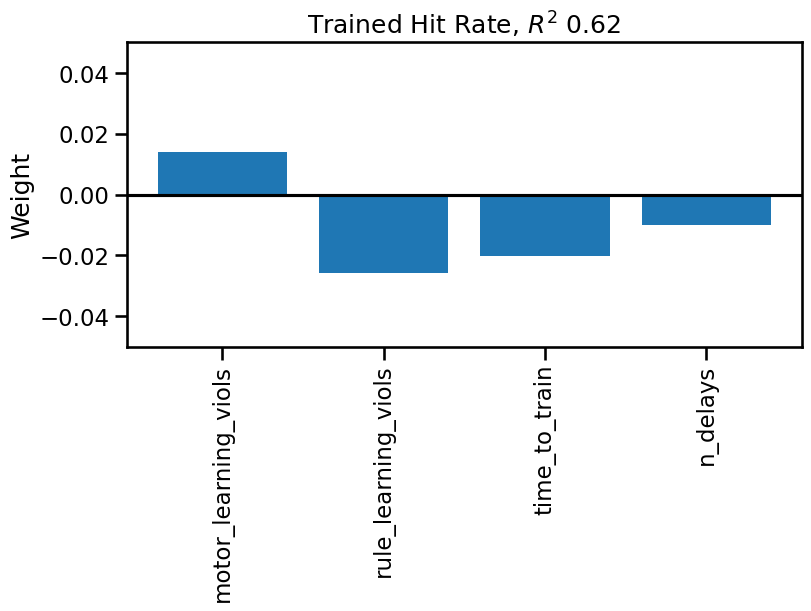

In [20]:
features = [
    "motor_learning_viols",
    "rule_learning_viols",
    "time_to_train",
    "n_delays",
]
predictor = "post_train_hit_by_session"

model, predict, rsq, rns, ws = fit_linear_model(
    data, predictor, features, whiten=True, plot=False
)

fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)
plot_weights(ax, rns, ws, f"Trained Hit Rate, $R^2$ {rsq:.2f}")
plt.ylim(-0.05, 0.05)

> **Summary**: these results show that motor learning violations are positively correlated with trained hit rate (ie better performance), while violation rates in the rule learning phase, the number of session it took an animal to training and the number of delays between sa/sb an animal saw is negatively correlated.

I will also do a univariate linear regression on the violations dataset to show the negative correlation between the session violation rate and the session hit rate. If i had violations for all sessions, I would use the entire df for this.

In [22]:
vdf_hit_viol_by_session = (
    vdf.groupby(["animal_id", "session"])[["violation", "hit"]]
    .mean()
    .reset_index()
    .groupby("animal_id")[["violation", "hit"]]
    .mean()
    .reset_index()
)

In [37]:
x = "violation"
y = "hit"
results = univariate_linear_regression(
    vdf_hit_viol_by_session, x, y, print_results=True
)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     19.48
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           0.000380
Time:                        17:56:54   Log-Likelihood:                 43.210
No. Observations:                  19   AIC:                            -82.42
Df Residuals:                      17   BIC:                            -80.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7700      0.019     40.526      0.0

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Axes: title={'center': 'hit vs violation'}, xlabel='violation', ylabel='hit'>

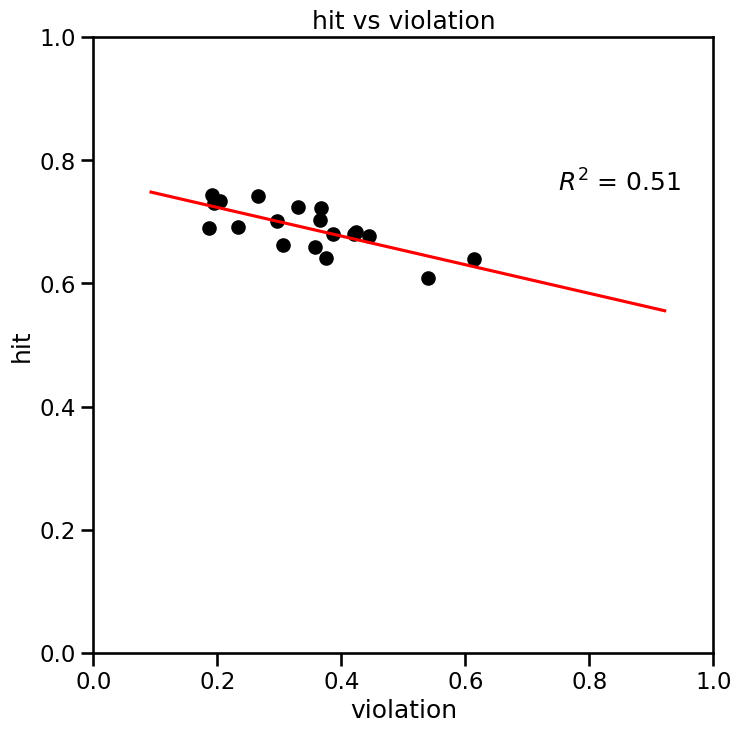

In [41]:
plot_univariate_linear_regression(
    results, xlabel=x, ylabel=y, title=f"{y} vs {x}", xlim=(0, 1), ylim=(0, 1)
)

> **Summary**: For the sessions where violation rate is tracked, there is a negative correlation between violation rate and hit rate.

### Prev Violation Model Comparison Multiclass

Here, I am going to load in some data for the model comparison i did with the multiclass model for using base (psytrack) regressors, prev violation binary and prev violation filtered regressors. I saw some interesting splitting between the fits and I want to see if there are any variables that explain it. This is work from the notebook `2023_09_compare_prev_viol_psytrack.ipynb`

In [43]:
f_name = "/Users/jessbreda/Desktop/github/animal-learning/data/results/compare_prev_viol_psytrack_bits_per_trial.csv"

model_comp_df = pd.read_csv(f_name)
model_comp_df.drop_duplicates(inplace=True)
data = model_comp_df.dropna()  # get rid of null values
outlier_animals = ["W061"]  # this animal never really trained up
data = data.query("animal_id != @outlier_animals")

(0.0, 0.4)

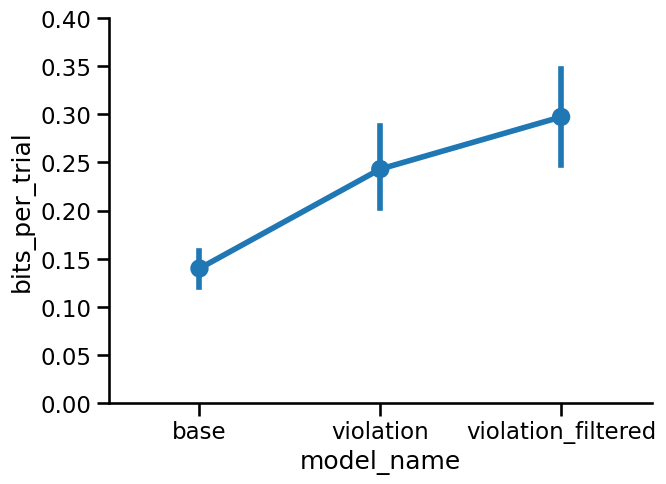

In [44]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.pointplot(data, x="model_name", y="bits_per_trial", ax=ax)

sns.despine()
ax.set_ylim(0, 0.4)

(0.0, 0.4)

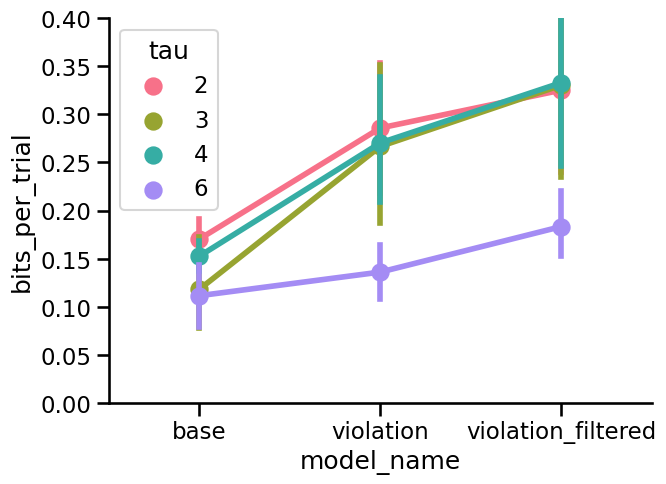

In [45]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.pointplot(
    data, x="model_name", y="bits_per_trial", hue="tau", ax=ax, palette="husl"
)

sns.despine()
ax.set_ylim(0, 0.4)
# ax.legend().set_visible(False)

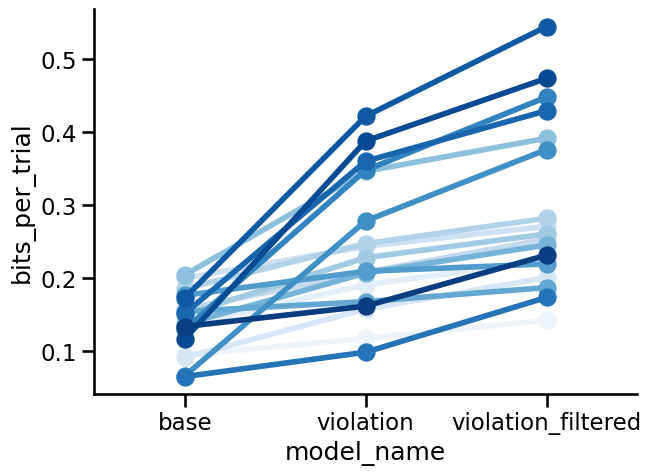

In [46]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.pointplot(
    data, x="model_name", y="bits_per_trial", hue="animal_id", ax=ax, palette="Blues"
)

sns.despine()
ax.legend().set_visible(False)

I want to see if these model fitting effects are due to the dataset where animals onyl have violation information until session 200. Perhaps, the animals that are trained in this time frame have better fits. 

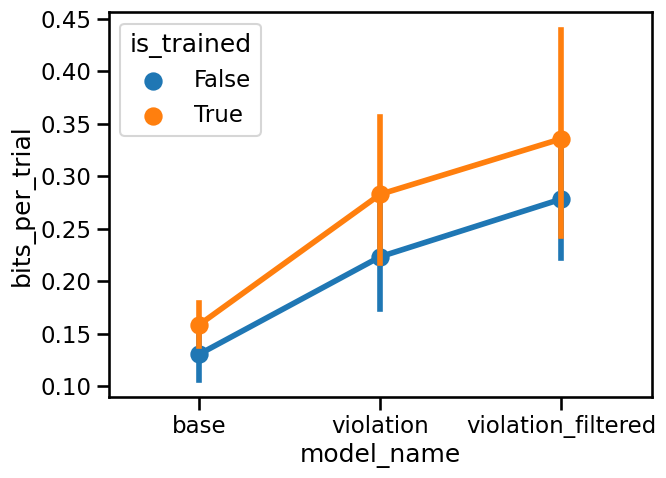

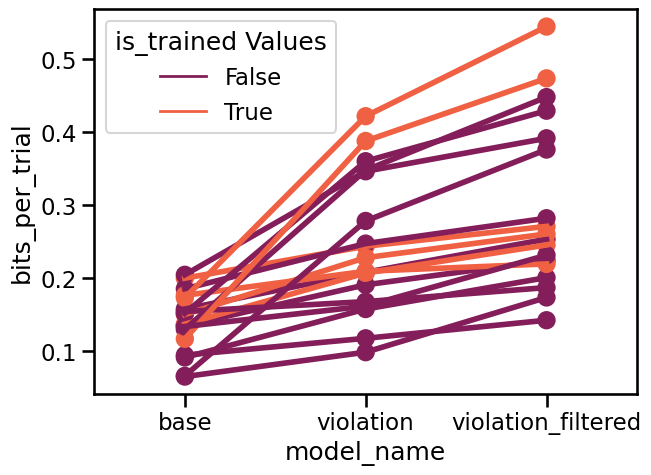

In [ ]:
merged_df["is_trained"] = merged_df["time_to_train"] < 200


fig, ax = plt.subplots(figsize=(7, 5))

sns.pointplot(merged_df, x="model_name", y="bits_per_trial", hue="is_trained", ax=ax)


# Create a color palette
cat_var = "is_trained"

unique_vars = sorted(merged_df[cat_var].unique())
palette = sns.color_palette("rocket", len(unique_vars))

# Create a tau to color mapping
color_map = dict(zip(unique_vars, palette))

fig, ax = plt.subplots(figsize=(7, 5))


# Loop through each unique animal_id
unique_animal_ids = merged_df["animal_id"].unique()

for animal_id in unique_animal_ids:
    subset_data = merged_df[merged_df["animal_id"] == animal_id]
    var_value = subset_data[cat_var].iloc[
        0
    ]  # Since each animal_id has one tau, just get the first one
    color = color_map[var_value]

    sns.pointplot(
        data=subset_data, x="model_name", y="bits_per_trial", color=color, ax=ax
    )

# # Create a custom legend
legend_labels = [
    plt.Line2D([0], [0], color=color, lw=2) for color in color_map.values()
]
ax.legend(legend_labels, unique_vars, title=f"{cat_var} Values")
# ax.set_title("Point Plot Example")

# plt.show()

> **Summary**: There is some effect of trained animals having better fits, but the error bars suggest this is not significant. Good to double check this but I think the effect is minimal.

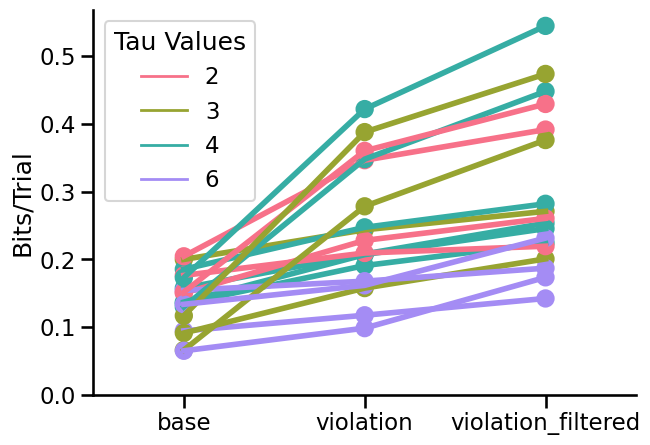

In [47]:
# Create a color palette
unique_taus = sorted(data["tau"].unique())
palette = sns.color_palette("husl", len(unique_taus))

# Create a tau to color mapping
tau_color_map = dict(zip(unique_taus, palette))
fig, ax = plt.subplots(figsize=(7, 5))

# Loop through each unique animal_id
unique_animal_ids = data["animal_id"].unique()

for animal_id in unique_animal_ids:
    subset_data = data[data["animal_id"] == animal_id]
    tau_value = subset_data["tau"].iloc[
        0
    ]  # Since each animal_id has one tau, just get the first one
    color = tau_color_map[tau_value]

    sns.pointplot(
        data=subset_data.query("animal_id != @outlier_animals"),
        x="model_name",
        y="bits_per_trial",
        color=color,
        ax=ax,
    )

# Create a custom legend
legend_labels = [
    plt.Line2D([0], [0], color=color, lw=2) for color in tau_color_map.values()
]
ax.legend(legend_labels, unique_taus, title="Tau Values")
ax.set_ylim(0, None)

ax.set(ylabel="Bits/Trial", xlabel="")
sns.set_context("talk")
sns.despine()

> **Summary (interim)**: it appears that larger taus are associated with poorer model fit.

Now, lets see if I can find any other relationships between tau and other training features I have access to such as time to train or overall performance.

In [51]:
merged_df = pd.merge(data, train_threshold_df, on="animal_id", how="left")
merged_df = pd.merge(merged_df, vdf_hit_viol_by_session, on="animal_id", how="left")
merged_df.head()

,animal_id,nll,model_name,n_test_trials,tau,log_like,bits_per_trial,n_crossings,time_to_train,min_cross_sess,post_train_hit_by_session,n_delays,motor_learning_viols,rule_learning_viols,violation,hit
0,W051,13860.100598,base,14534,6,-13860.100598,0.094180,6,307,135,0.792447,9,0.209089,0.154351,0.185865,0.689996
1,W051,13627.588535,violation,14534,6,-13627.588535,0.117260,6,307,135,0.792447,9,0.209089,0.154351,0.185865,0.689996
2,W051,13377.834257,violation_filtered,14534,6,-13377.834257,0.142051,6,307,135,0.792447,9,0.209089,0.154351,0.185865,0.689996
3,W060,9673.801121,base,10436,4,-9673.801121,0.134563,4,258,92,0.825624,4,0.227650,0.136164,0.191715,0.744253
4,W060,9268.344014,violation,10436,4,-9268.344014,0.190614,4,258,92,0.825624,4,0.227650,0.136164,0.191715,0.744253


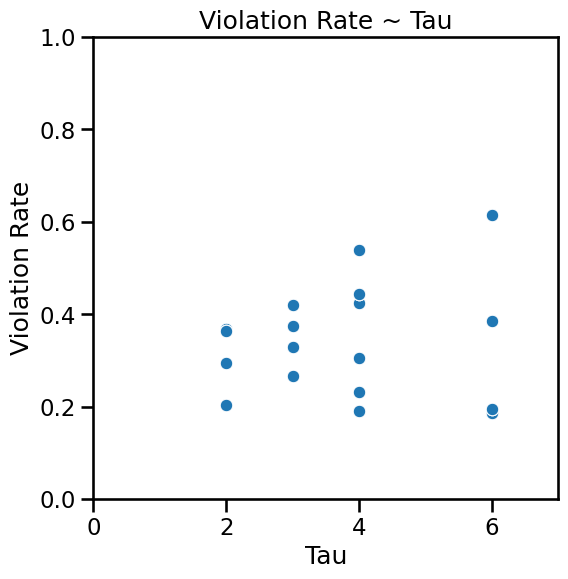

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.scatterplot(data=merged_df, x="tau", y="violation", ax=ax)
_ = ax.set(
    xlim=(0, 7),
    ylim=(0, 1),
    xlabel="Tau",
    ylabel="Violation Rate",
    title="Violation Rate ~ Tau",
)

In [54]:
sub_df = merged_df[["animal_id", "tau", "violation"]].copy().drop_duplicates()

results = univariate_linear_regression(sub_df, "tau", "violation", print_results=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                    0.1388
Date:                Tue, 17 Oct 2023   Prob (F-statistic):              0.714
Time:                        18:04:09   Log-Likelihood:                 13.049
No. Observations:                  18   AIC:                            -22.10
Df Residuals:                      16   BIC:                            -20.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3116      0.084      3.688      0.0

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


> **Summary**: there doesn't appear to be a relationship between tau and violation rate so it's not that animals with higher taus have more violations per session.

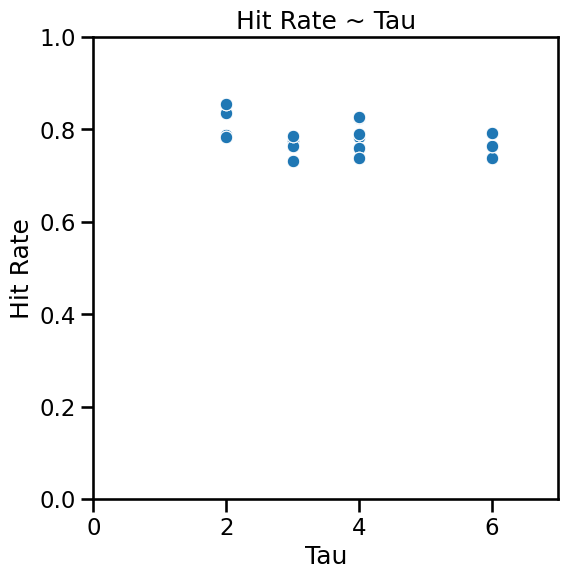

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.scatterplot(data=merged_df, x="tau", y="post_train_hit_by_session", ax=ax)
_ = ax.set(
    xlim=(0, 7),
    ylim=(0, 1),
    xlabel="Tau",
    ylabel="Hit Rate",
    title="Hit Rate ~ Tau",
)

In [57]:
sub_df = merged_df[["animal_id", "tau", "hit"]].copy().drop_duplicates()

results = univariate_linear_regression(sub_df, "tau", "hit", print_results=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.319
Date:                Tue, 17 Oct 2023   Prob (F-statistic):              0.268
Time:                        18:05:18   Log-Likelihood:                 34.645
No. Observations:                  18   AIC:                            -65.29
Df Residuals:                      16   BIC:                            -63.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7196      0.025     28.268      0.0

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


> **Summary**: A similar finding for hit rate- there seems to be a slight negative correlation but the $r^2$ isn't very good.

#### Time to Train & Tau

<Axes: xlabel='tau', ylabel='time_to_train'>

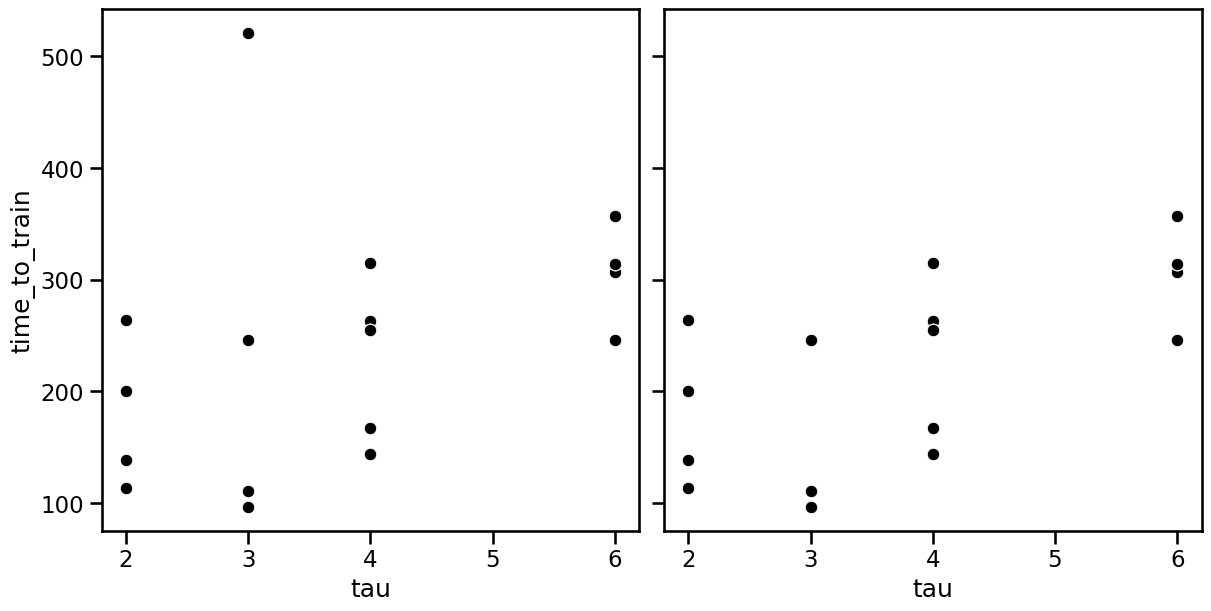

In [63]:
fig, ax = plt.subplots(
    1, 2, figsize=(12, 6), sharey=True, sharex=True, constrained_layout=True
)

sns.scatterplot(
    data=merged_df,
    x="tau",
    y="time_to_train",
    color="k",
    ax=ax[0],
)
sns.scatterplot(
    data=merged_df.query("animal_id != 'W062'"),
    x="tau",
    y="time_to_train",
    color="k",
    ax=ax[1],
)


It does appear that there is a relationship between time to train and tau. The one thing is that there is an outlier animal (W062). I've included them in the plot on the left and removed them in the plot on the right. The following analyses are no longer significant if this animal is included. I feel torn on this matter since this animal look over 500 days to train. That is over 1.5 years and seems unfeasible for this task. Moreover, the training curve for this animal (in the eda.ipynb) looks unlike any of the other animals. it isn't until over session 200 that they start consistently increasing in performance. Because they are such an outlier, and don't seem to have the same training trajectory as the other 17 animals, I am not going to include them in the following analyses for the presentation and I will look into further details as to why they did not start really training until session 200.

Text(0.5, 1.0, 'Hit Rate ~ Time To Train')

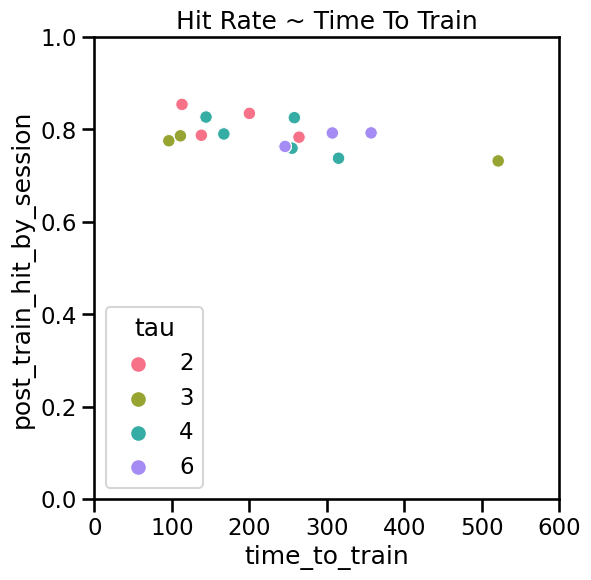

In [282]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(
    data=merged_df,
    y="post_train_hit_by_session",
    x="time_to_train",
    hue="tau",
    ax=ax,
    palette=sns.color_palette("husl", 4),
)
plt.xlim(0, 600)
plt.ylim(0, 1)
plt.title("Hit Rate ~ Time To Train")

> **Summary**: There is not much multi-variate relationship between hit rate & time to train & tau. Although a multi-variate model with tau included would be a good idea.

(0.0, 1.0)

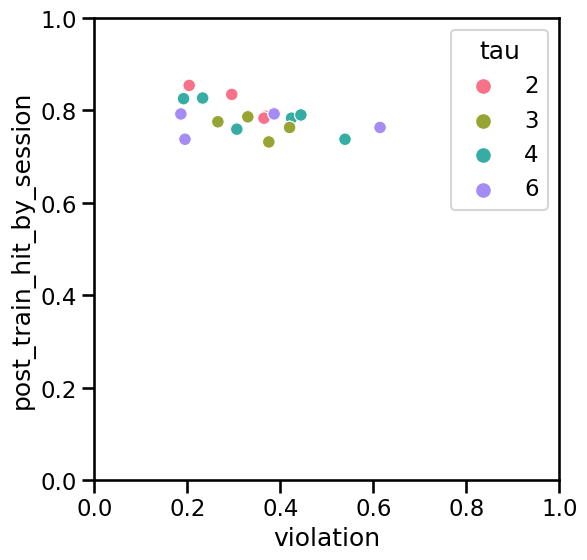

In [281]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(
    data=merged_df,
    y="post_train_hit_by_session",
    x="violation",
    hue="tau",
    ax=ax,
    palette=sns.color_palette("husl", 4),
)
plt.xlim(0, 1)
plt.ylim(0, 1)
# plt.title("Hit Rate ~ Time To Train")

**Summary**: Similar to above, the multivariate relationship isn't clear by eye but tau should be included in a model

In [68]:
sub_df = (
    merged_df[["animal_id", "tau", "time_to_train"]]
    .query("time_to_train < 400")  # this drop W062
    .copy()
    .drop_duplicates()
)

results = univariate_linear_regression(
    sub_df, "tau", "time_to_train", print_results=True
)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     10.69
Date:                Tue, 17 Oct 2023   Prob (F-statistic):            0.00517
Time:                        18:38:05   Log-Likelihood:                -93.841
No. Observations:                  17   AIC:                             191.7
Df Residuals:                      15   BIC:                             193.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.2406     44.691      1.930      0.0

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Axes: title={'center': 'Time to Train ~ Tau'}, xlabel='tau', ylabel='time_to_train'>

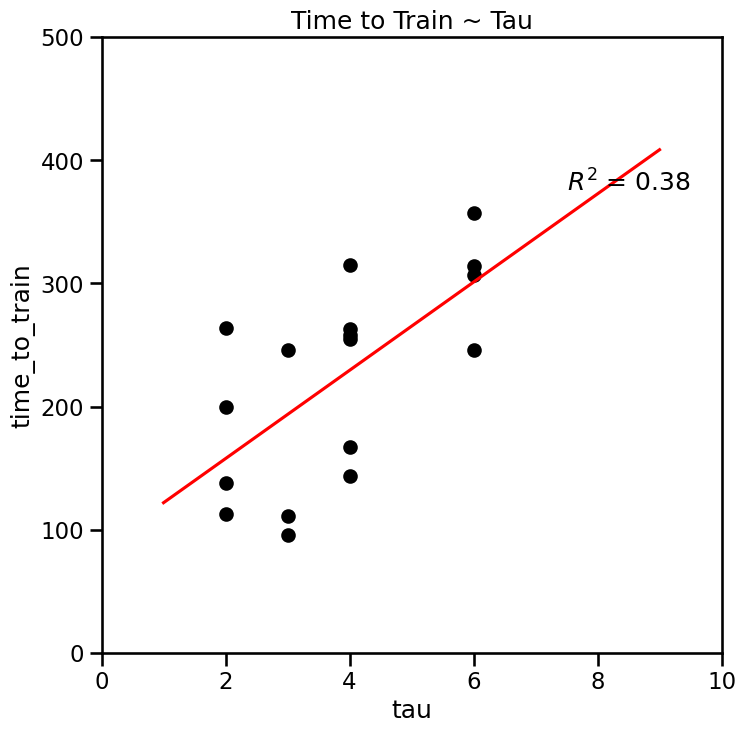

In [73]:
plot_univariate_linear_regression(
    results,
    xlabel="tau",
    ylabel="time_to_train",
    title="Time to Train ~ Tau",
    xlim=(0, 10),
    ylim=(0, 500),
)

> **Summary:** There appears to be a strong correlation between tau for the previous violation regressor and time to train (again remember outlier W062 was removed). This could be due to two separate causes that are currently indistinguishable with the given dataset.

> 1. Tau gets smaller over time as you become more trained. Because we have only sessions 0-200, the animals later in training have less refined taus. 

> 2. Longer taus cause you to train slower. This could mean these animals have more "bouts" or "bursts" of violations. And this makes it harder to acquire the task. Remember though, tau and session violation rate do not seem to be highly correlated so it's about when the violations occur- not how many.

In [78]:
sub_df = (
    merged_df[["animal_id", "tau", "post_train_hit_by_session", "time_to_train"]]
    .query("time_to_train < 400")
    .copy()
    .drop_duplicates()
)


results = univariate_linear_regression(
    sub_df, "tau", "post_train_hit_by_session", print_results=True
)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     2.950
Date:                Tue, 17 Oct 2023   Prob (F-statistic):              0.106
Time:                        18:41:59   Log-Likelihood:                 36.198
No. Observations:                  17   AIC:                            -68.40
Df Residuals:                      15   BIC:                            -66.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8222      0.021     38.622      0.0

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Axes: title={'center': 'Hit Rate ~ Tau'}, xlabel='tau', ylabel='post_train_hit_by_session'>

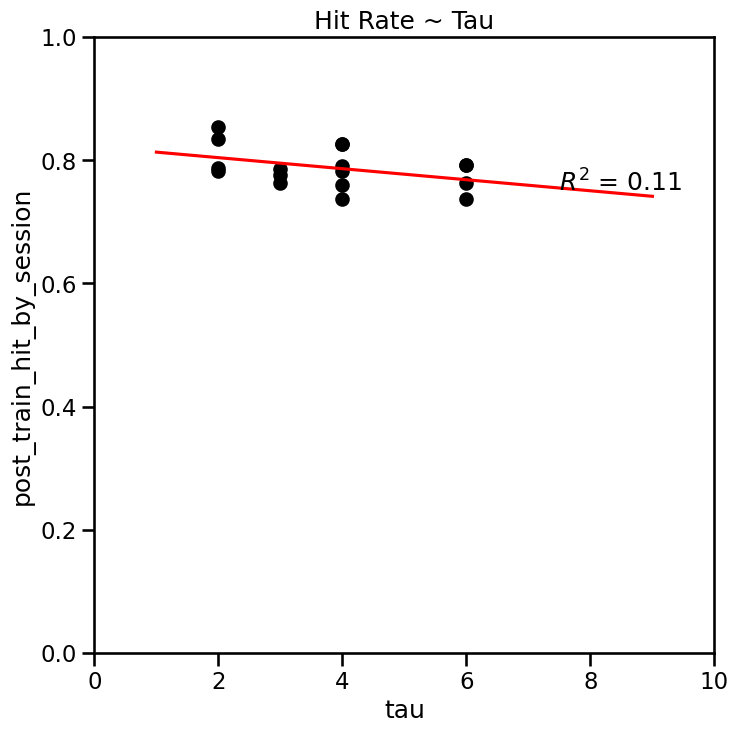

In [77]:
plot_univariate_linear_regression(
    results,
    xlabel="tau",
    ylabel="post_train_hit_by_session",
    title="Hit Rate ~ Tau",
    xlim=(0, 10),
    ylim=(0, 1),
)

>**Summary**: There is some relationship between tau and post train hit rate. This is not surprising since we know that time to train is negatively correlated with post-trained hit rate. This will be more interesting to look at when we have access to the full violations dataset and can see how violations once "trained" influence  performance metrics.

(0.0, 1.0)

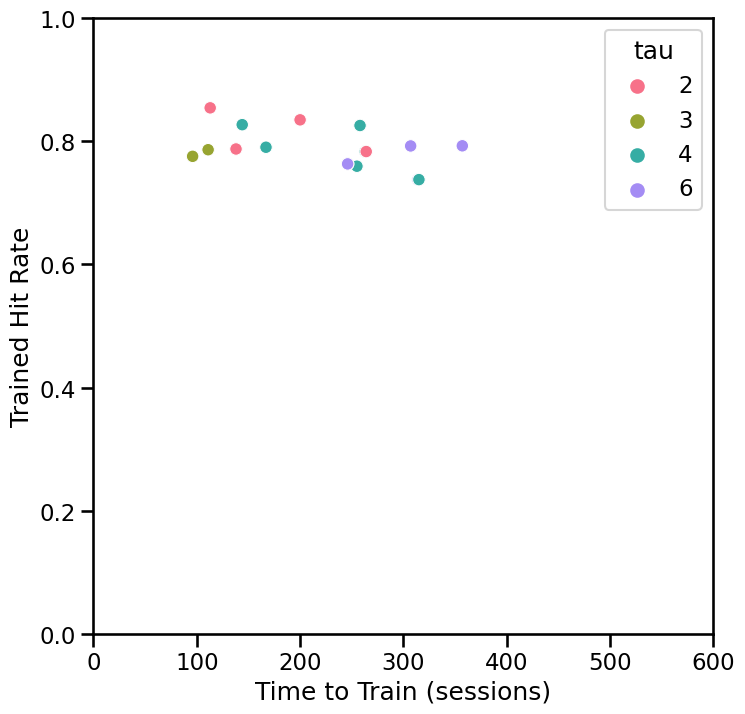

In [309]:
plt.figure(figsize=(8, 8))
slope = results.params[1]
intercept = results.params[0]

# Plot the data points
sns.scatterplot(
    data=sub_df,
    y="post_train_hit_by_session",
    x="time_to_train",
    hue="tau",
    palette=sns.color_palette("husl", 4),
)

# Add labels and title
plt.ylabel("Trained Hit Rate")
plt.xlabel("Time to Train (sessions)")
plt.xlim(0, 600)
plt.ylim(0, 1)

# plt.title("Time to Train ~ Tau")
# plt.xlabel("Tau")
# plt.ylabel("Time to Train (sessions)")

# # Add legend

# plt.text(0.7, 5, f"$R^2$ = {results.rsquared_adj:.2f}")

/Users/jessbreda/Desktop/github/animal-learning/notebooks/../src/models/linear_regression.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


(-0.05, 0.05)

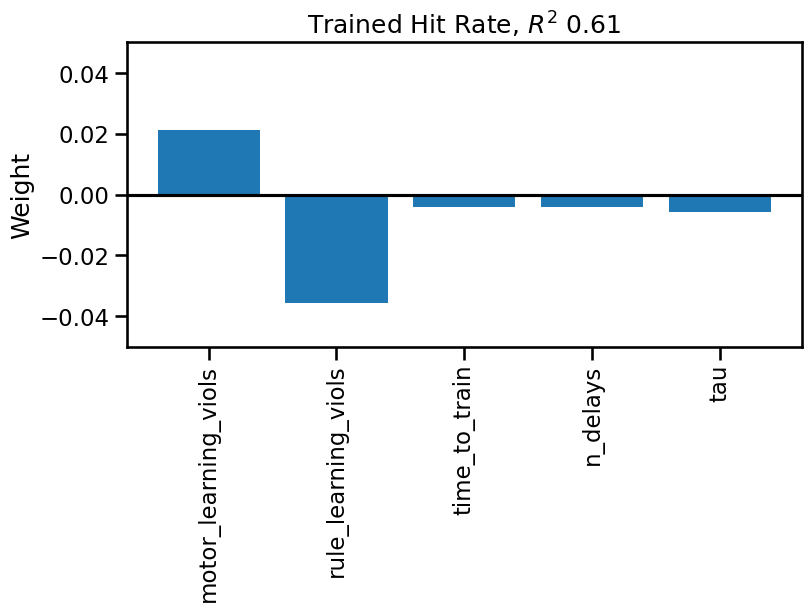

In [90]:
features = [
    "motor_learning_viols",
    "rule_learning_viols",
    "time_to_train",
    "n_delays",
    "tau",
]

predictor = "post_train_hit_by_session"
sub_df = (
    merged_df[features + [predictor]]
    .query("time_to_train < 400")
    .copy()
    .drop_duplicates()
)

model, predict, rsq, rns, ws = fit_linear_model(
    sub_df, predictor, features, whiten=True, plot=False
)

fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)
plot_weights(ax, rns, ws, f"Trained Hit Rate, $R^2$ {rsq:.2f}")
plt.ylim(-0.05, 0.05)

/Users/jessbreda/Desktop/github/animal-learning/notebooks/../src/models/linear_regression.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


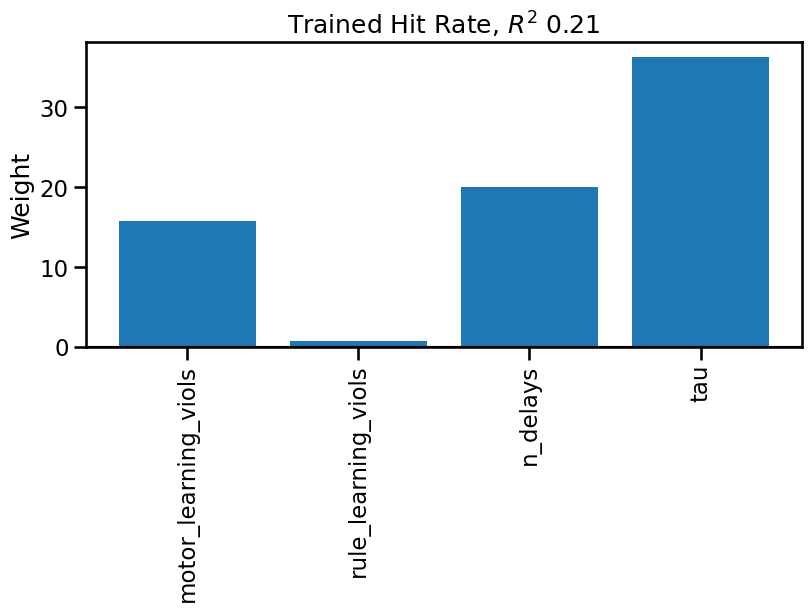

In [99]:
features = [
    "motor_learning_viols",
    "rule_learning_viols",
    "n_delays",
    "tau",
]

predictor = "time_to_train"
sub_df = (
    merged_df[features + [predictor]]
    # .query("time_to_train < 400")
    .copy().drop_duplicates()
)

model, predict, rsq, rns, ws = fit_linear_model(
    sub_df, predictor, features, whiten=True, plot=False
)

fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)
plot_weights(ax, rns, ws, f"Trained Hit Rate, $R^2$ {rsq:.2f}")
# plt.ylim(-0.05, 0.05)

> **Summary**: it does appear that tau impacts the post train hit rate negatively. but the largest effect is for the time to train. without tau the r^2 is 0.23. With tau it is 0.53. Again, keep in mind this is with the outlier removed. With the outlier included r^2 is 0.21 with tau and 0.10 without tau.